In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
def get_generation_target(eval_set, model):
    with open(f'../../evaluation/{eval_set}/generations/{model}/generation.txt', 'r') as f:
        generation = f.readlines()
    
    with open(f'../../evaluation/{eval_set}/target.txt', 'r') as f:
        target = f.readlines()
        
    return generation, target

In [7]:
generation, target = get_generation_target(eval_set='gendered_test_set', model='model_full')

In [8]:
len(generation), len(target)

(500, 500)

In [9]:
generation[-1], target[-1]

("man's business trip is cancelled and they are at home with a rather nervous wife.\n",
 "man's business trip is cancelled and they are at home with a rather nervous wife.\n")

In [10]:
def eval_full(model):
    y_label, y_pred = list(), list()
    
    gendered_generation, gendered_target = get_generation_target(eval_set='gendered_test_set', model=model)
    nongendered_generation, nongendered_target = get_generation_target(eval_set='nongendered_test_set', model=model)
    
    for generation, target in zip(gendered_generation, gendered_target):
        y_label.append(True)
        y_pred.append(generation == target)
    
    for generation, target in zip(nongendered_generation, nongendered_target):
        y_label.append(False)
        y_pred.append(generation != target)
    
    return y_label, y_pred

In [51]:
def get_confusion_matrix(y_label, y_pred):
    cm = confusion_matrix(y_label, y_pred)
    print('confusion matrix')
    print(cm)
    tn, fp, fn, tp = cm.ravel()
    print(f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}')
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='d');

    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels');

    ax.xaxis.set_ticklabels(['nongendered', 'gendered']);
    ax.yaxis.set_ticklabels(['nongendered', 'gendered']);
    
    print('---')
    
    prec = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * prec * recall / (prec + recall)
    acc = (tp + tn) / (tp + tn + fp + fn)
    print(f'precision: {round(prec, 3)}')
    print(f'recall: {round(recall, 3)}')
    print(f'f1: {round(f1, 3)}')
    print(f'accuracy: {round(acc, 3)}')

confusion matrix
[[500   0]
 [ 32 468]]
tn: 500, fp: 0, fn: 32, tp: 468
---
precision: 1.0
recall: 0.936
f1: 0.967
accuracy: 0.968


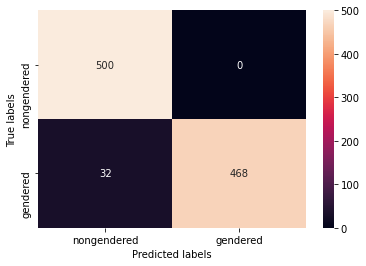

In [52]:
y_label, y_pred = eval_full(model='convert')
get_confusion_matrix(y_label=y_label, y_pred=y_pred)

confusion matrix
[[478  22]
 [ 62 438]]
tn: 478, fp: 22, fn: 62, tp: 438
---
precision: 0.952
recall: 0.876
f1: 0.913
accuracy: 0.916


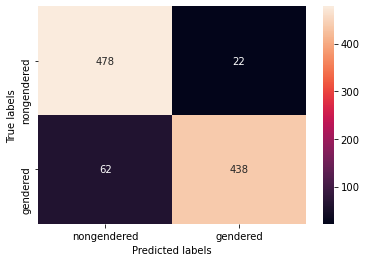

In [53]:
y_label, y_pred = eval_full(model='model_sa_nt_10_3')
get_confusion_matrix(y_label=y_label, y_pred=y_pred)